In [24]:
import numpy as np
from hmmlearn import hmm



In [25]:
# 加载saliency map数据
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")


In [28]:
print(saliency_map.shape)

(412, 263, 3)


In [31]:
# 获取saliency map数据的尺寸
height, width, _ = saliency_map.shape

# 将saliency map数据转换为二维数组
saliency_values = saliency_map[:,:,0].reshape(-1)  # 使用第一个通道的值作为显著性值

# 找到显著性值最高的三个区域的索引
top_indices = np.argsort(saliency_values)[-3:]

# 将一维索引转换为二维坐标
top_coordinates = np.unravel_index(top_indices, (height, width))

# 打印结果
print("显著性值最高的三个区域的坐标：", top_coordinates)

# 将选定的区域分配一个状态
states = ['A', 'B', 'C']

# 定义HMM模型
model = hmm.CategoricalHMM(n_components=3)

# 定义状态转移概率矩阵
transmat = np.array([[0.5, 0.3, 0.2],
                     [0.3, 0.4, 0.3],
                     [0.2, 0.3, 0.5]])
model.transmat_ = transmat

# 定义初始概率向量
startprob = np.array([0.3, 0.4, 0.3])
model.startprob_ = startprob

# 定义观测概率矩阵
observations = saliency_values[top_indices]
observations = observations.reshape(1, -1)
model.emissionprob_ = observations

# 打印HMM模型的参数
print("状态转移概率矩阵:\n", model.transmat_)
print("初始概率向量:\n", model.startprob_)
print("观测概率矩阵:\n", model.emissionprob_)

显著性值最高的三个区域的坐标： (array([141, 141, 141]), array([139, 137, 138]))
状态转移概率矩阵:
 [[0.5 0.3 0.2]
 [0.3 0.4 0.3]
 [0.2 0.3 0.5]]
初始概率向量:
 [0.3 0.4 0.3]
观测概率矩阵:
 [[249 249 251]]


In [35]:
import pandas as pd
from numpy import array


# 显著性值最高的三个区域的坐标
top_coordinates = (array([141, 141, 141]), array([139, 137, 138]))

# 状态转移概率矩阵
transition_matrix = [[0.5, 0.3, 0.2], [0.3, 0.4, 0.3], [0.2, 0.3, 0.5]]

# 初始概率向量
prior_vector = [0.3, 0.4, 0.3]

# 创建表格
df = pd.DataFrame({'Top Coordinates': top_coordinates[0], 'Left Coordinates': top_coordinates[1]})
df['States'] = ['A', 'B', 'C']
df['Prior Probability'] = prior_vector
for i, state in enumerate(['A', 'B', 'C']):
    df[state] = transition_matrix[i]

# 打印表格
print(df)

   Top Coordinates  Left Coordinates States  Prior Probability    A    B    C
0              141               139      A                0.3  0.5  0.3  0.2
1              141               137      B                0.4  0.3  0.4  0.3
2              141               138      C                0.3  0.2  0.3  0.5


In [39]:
import numpy as np
from hmmlearn import hmm

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 300 saliency scores
top_indices = np.argsort(saliency_scores)[-300:]

# Randomly select three regions of 100 pixels each
np.random.shuffle(top_indices)
region1 = top_indices[:100]
region2 = top_indices[100:200]
region3 = top_indices[200:300]

# Create prior probabilities for the three regions
prior = np.zeros(3)
prior[0] = len(region1) / len(top_indices)
prior[1] = len(region2) / len(top_indices)
prior[2] = len(region3) / len(top_indices)

# Create transition matrix for the three regions
transition_matrix = np.zeros((3, 3))
transition_matrix[0, 1] = len(np.intersect1d(region1, region2)) / len(region1)
transition_matrix[0, 2] = len(np.intersect1d(region1, region3)) / len(region1)
transition_matrix[1, 0] = len(np.intersect1d(region2, region1)) / len(region2)
transition_matrix[1, 2] = len(np.intersect1d(region2, region3)) / len(region2)
transition_matrix[2, 0] = len(np.intersect1d(region3, region1)) / len(region3)
transition_matrix[2, 1] = len(np.intersect1d(region3, region2)) / len(region3)

# Create HMM model
model = hmm.CategoricalHMM(n_components=3)
model.startprob_ = prior
model.transmat_ = transition_matrix

# Print prior probabilities and transition matrix
print("Prior probabilities:")
print(prior)
print("Transition matrix:")
print(transition_matrix)

Prior probabilities:
[0.33333333 0.33333333 0.33333333]
Transition matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [41]:
import numpy as np
from hmmlearn import hmm

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 300 saliency scores
top_indices = np.argsort(saliency_scores)[-300:]

# Randomly select three regions of 100 pixels each
np.random.shuffle(top_indices)
region1 = top_indices[:100]
region2 = top_indices[100:200]
region3 = top_indices[200:300]

# Create prior probabilities for the three regions
prior = np.zeros(3)
prior[0] = len(region1) / len(top_indices)
prior[1] = len(region2) / len(top_indices)
prior[2] = len(region3) / len(top_indices)

# Create transition matrix for the three regions
transition_matrix = np.zeros((3, 3))
if len(np.intersect1d(region1, region2)) > 0:
    transition_matrix[0, 1] = len(np.intersect1d(region1, region2)) / len(region1)
if len(np.intersect1d(region1, region3)) > 0:
    transition_matrix[0, 2] = len(np.intersect1d(region1, region3)) / len(region1)
if len(np.intersect1d(region2, region1)) > 0:
    transition_matrix[1, 0] = len(np.intersect1d(region2, region1)) / len(region2)
if len(np.intersect1d(region2, region3)) > 0:
    transition_matrix[1, 2] = len(np.intersect1d(region2, region3)) / len(region2)
if len(np.intersect1d(region3, region1)) > 0:
    transition_matrix[2, 0] = len(np.intersect1d(region3, region1)) / len(region3)
if len(np.intersect1d(region3, region2)) > 0:
    transition_matrix[2, 1] = len(np.intersect1d(region3, region2)) / len(region3)

# Create HMM model
model = hmm.CategoricalHMM(n_components=3)
model.startprob_ = prior
model.transmat_ = transition_matrix

# Print prior probabilities and transition matrix
print("Prior probabilities:")
print(prior)
print("Transition matrix:")
print(transition_matrix)

Prior probabilities:
[0.33333333 0.33333333 0.33333333]
Transition matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [43]:
import numpy as np
from hmmlearn import hmm

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 300 saliency scores
top_indices = np.argsort(saliency_scores)[-300:]

# Randomly select three regions of 100 pixels each
np.random.shuffle(top_indices)
region1 = top_indices[:100]
region2 = top_indices[100:200]
region3 = top_indices[200:300]

# Create prior probabilities for the three regions
prior = np.zeros(3)
prior[0] = len(region1) / len(top_indices)
prior[1] = len(region2) / len(top_indices)
prior[2] = len(region3) / len(top_indices)

# Create transition matrix for the three regions
transition_matrix = np.zeros((3, 3))
if len(np.intersect1d(region1, region2)) > 0:
    transition_matrix[0, 1] = len(np.intersect1d(region1, region2)) / len(region1)
if len(np.intersect1d(region1, region3)) > 0:
    transition_matrix[0, 2] = len(np.intersect1d(region1, region3)) / len(region1)
if len(np.intersect1d(region2, region1)) > 0:
    transition_matrix[1, 0] = len(np.intersect1d(region2, region1)) / len(region2)
if len(np.intersect1d(region2, region3)) > 0:
    transition_matrix[1, 2] = len(np.intersect1d(region2, region3)) / len(region2)
if len(np.intersect1d(region3, region1)) > 0:
    transition_matrix[2, 0] = len(np.intersect1d(region3, region1)) / len(region3)
if len(np.intersect1d(region3, region2)) > 0:
    transition_matrix[2, 1] = len(np.intersect1d(region3, region2)) / len(region3)

# Create HMM model
model = hmm.CategoricalHMM(n_components=3)
model.startprob_ = prior
model.transmat_ = transition_matrix

# Print prior probabilities and transition matrix
print("Prior probabilities:")
print(prior)
print("Transition matrix:")
print(transition_matrix)

Prior probabilities:
[0.33333333 0.33333333 0.33333333]
Transition matrix:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [48]:
import numpy as np
from sklearn.cluster import KMeans
from hmmlearn import hmm

# 加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")
height, width, _ = saliency_map.shape

# 将Saliency Map转换为一维数组
#saliency_scores = saliency_map.reshape(-1)
saliency_values = saliency_map[:,:,0].reshape(-1)  # 使用第一个通道的值作为显著性值

# 选取Top-K区域
top_k_indices = np.argsort(saliency_scores)[-3:]  # 获取最高的三个分数的索引

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height, width))  # 修改此处的顺序

# 进行co-clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(np.transpose(top_k_coordinates))

# 生成HMM模型
hmm_model = hmm.MultinomialHMM(n_components=3)

# 创建观测序列
observations = np.vstack(top_k_coordinates).T

# 训练HMM模型
hmm_model.fit(observations)

# 获取先验概率和转移概率
prior_probabilities = hmm_model.startprob_
transition_probabilities = hmm_model.transmat_

# 打印结果
print("Top-K Coordinates: ")
for i, coordinate in enumerate(top_k_coordinates):
    print(f"Region {i+1}: {coordinate}")
print("Clusters: ", clusters)
print("Prior Probabilities: ", prior_probabilities)
print("Transition Probabilities: ")
print(transition_probabilities)

ValueError: index 147236 is out of bounds for array with size 108356

In [49]:
import numpy as np
from sklearn.cluster import KMeans
from hmmlearn import hmm

# 加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")
height, width, _ = saliency_map.shape

# 将Saliency Map转换为一维数组
saliency_scores = saliency_map.reshape(-1)

# 选取Top-K区域
top_k_indices = np.argsort(saliency_scores)[-3:]  # 获取最高的三个分数的索引

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height * width,))  # 修改此处的顺序和大小

# 进行co-clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(np.transpose(top_k_coordinates))

# 生成HMM模型
hmm_model = hmm.MultinomialHMM(n_components=3)

# 创建观测序列
observations = np.vstack(top_k_coordinates).T

# 训练HMM模型
hmm_model.fit(observations)

# 获取先验概率和转移概率
prior_probabilities = hmm_model.startprob_
transition_probabilities = hmm_model.transmat_

# 打印结果
print("Top-K Coordinates: ")
for i, coordinate in enumerate(top_k_coordinates):
    print(f"Region {i+1}: {coordinate}")
print("Clusters: ", clusters)
print("Prior Probabilities: ", prior_probabilities)
print("Transition Probabilities: ")
print(transition_probabilities)

ValueError: index 147236 is out of bounds for array with size 108356

In [53]:
import numpy as np
from sklearn.cluster import KMeans
from hmmlearn import hmm

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 3 saliency scores
top_k_indices = np.argsort(saliency_scores)[-3:]
print(top_k_indices)

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height, width))  # 修改此处的顺序和大小

# 进行co-clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(np.transpose(top_k_coordinates))

# 生成HMM模型
hmm_model = hmm.CategoricalHMM(n_components=3)

# 创建观测序列
observations = np.vstack(top_k_coordinates).T

# 训练HMM模型
hmm_model.fit(observations)

# 获取先验概率和转移概率
prior_probabilities = hmm_model.startprob_
transition_probabilities = hmm_model.transmat_

# 打印结果
print("Top-K Coordinates: ")
for i, coordinate in enumerate(top_k_coordinates):
    print(f"Region {i+1}: {coordinate}")
print("Clusters: ", clusters)
print("Prior Probabilities: ", prior_probabilities)
print("Transition Probabilities: ")
print(transition_probabilities)

/Users/luopeiyuan/opt/anaconda3/envs/fyp/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Fitting a model with 575 free scalar parameters with only 6 data points will result in a degenerate solution.


[49841 49316 49578]
Top-K Coordinates: 
Region 1: [189 187 188]
Region 2: [134 135 134]
Clusters:  [2 0 1]
Prior Probabilities:  [0.         0.94771127 0.05228873]
Transition Probabilities: 
[[9.99999995e-01 8.15359413e-77 5.43670363e-09]
 [9.92562661e-01 5.51247120e-71 7.43733901e-03]
 [9.98371899e-01 1.50793906e-72 1.62810092e-03]]


[35383 39462 34126]


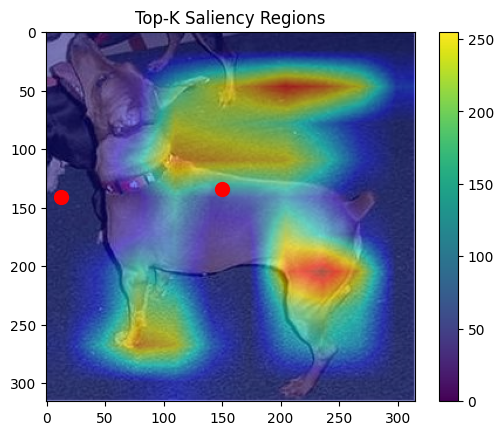

In [162]:
import numpy as np
import matplotlib.pyplot as plt

# Load saliency map data
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10010.npy")

# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 3 saliency scores
top_k_indices = np.argsort(saliency_scores)[-3:]
print(top_k_indices)

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, (height, width))  # 修改此处的顺序和大小

# 绘制Saliency Map
plt.imshow(saliency_map)
plt.colorbar()

# 标记Top-K区域
for coordinate in top_k_coordinates:
    plt.plot(coordinate[1], coordinate[0], 'ro', markersize=10)  # 注意坐标顺序

plt.title("Top-K Saliency Regions")
plt.show()

In [138]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# 加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

print(saliency_map.shape)
# Reshape saliency map data to 2D array
saliency_map_2d = saliency_map.reshape(-1, 3)

# Calculate saliency scores for each pixel
saliency_scores = np.sum(saliency_map_2d, axis=1)

# Find indices of top 3 saliency scores
top_k_indices = np.argsort(saliency_scores)[-3:]
print(top_k_indices)
for i in range(len(top_k_indices)):
    print(saliency_scores[top_k_indices[i]])

# 计算Top-K区域的坐标
top_k_coordinates = np.unravel_index(top_k_indices, saliency_map.shape[:2])  # 修改此处的顺序和大小
print(top_k_coordinates)



(412, 263, 3)
[49841 49316 49578]
631
634
634
(array([189, 187, 188]), array([134, 135, 134]))


In [139]:
# Convert the 1D indices to 2D coordinates (x, y)
top_k_coordinates = np.unravel_index(top_k_indices, saliency_map.shape[:2])

# Print the coordinates of the top 3 salient points
for i in range(len(top_k_indices)):
    x, y = top_k_coordinates[0][i], top_k_coordinates[1][i]
    print(f"Coordinate {i+1}: ({x}, {y})")

Coordinate 1: (189, 134)
Coordinate 2: (187, 135)
Coordinate 3: (188, 134)


In [141]:
# 假设您已经有了这三个点的横纵坐标：top_three_coordinates
top_three_points = np.column_stack(top_k_coordinates)
# 进行聚类
eps_values = [1, 5, 10, 15, 20]  # 邻域半径的候选值
min_samples_values = [1,2, 3, 4, 5,10]  # 最小样本数的候选值
# 参数搜索和评估
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(np.transpose(top_three_points))
        print(clusters)

[0 1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[0 1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[0 1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[0 1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[0 1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]
[-1 -1]


In [143]:
# 加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10000.npy")

# 获取显著度分数
saliency_scores = np.sum(saliency_map, axis=2)  # 在RGB通道上求和

# 获得具有最大显著度分数的三个点的横纵坐标
top_three_points = np.argpartition(saliency_scores.flatten(), -3)[-3:]
top_three_coordinates = np.unravel_index(top_three_points, saliency_scores.shape)

# 打印每个点的横纵坐标
for i in range(len(top_three_coordinates[0])):
    x = top_three_coordinates[0][i]
    y = top_three_coordinates[1][i]
    print(f"Point {i+1}: ({x}, {y})")

# 构建仅包含三个点的数据集
top_three_points_data = np.column_stack(top_three_coordinates)

# 定义聚类参数
eps = 10  # 邻域半径
min_samples = 5  # 最小样本数

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(top_three_points_data)

# 打印每个点的聚类标签和坐标
for i, point in enumerate(top_three_points_data):
    x, y = point
    cluster_label = clusters[i]
    print(f"Point ({x}, {y}) - Cluster {cluster_label}")
    print(clusters[i])

Point 1: (188, 135)
Point 2: (187, 135)
Point 3: (188, 134)
Point (188, 135) - Cluster -1
-1
Point (187, 135) - Cluster -1
-1
Point (188, 134) - Cluster -1
-1


In [165]:
# 加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10010.npy")

# 获取显著度分数
saliency_scores = np.sum(saliency_map, axis=2)  # 在RGB通道上求和

# 获得具有最大显著度分数的三个点的横纵坐标
top_three_points = np.argpartition(saliency_scores.flatten(), -3)[-3:]
top_three_coordinates = np.unravel_index(top_three_points, saliency_scores.shape)

# 打印每个点的横纵坐标
top_three_cdinates = []
for i in range(len(top_three_coordinates[0])):
    x = top_three_coordinates[0][i]
    y = top_three_coordinates[1][i]
    top_three_cdinates.append([x,y])
    print(f"Point {i+1}: ({x}, {y})")

print(top_three_cdinates)
# 原始数据集的所有点
all_points_coordinates = np.argwhere(saliency_scores > 400)
# print(all_points_coordinates)

# 构建完整数据集
data = np.concatenate((top_three_cdinates, all_points_coordinates), axis=0)
# print(data)

# 定义聚类参数
eps = 3  # 邻域半径
min_samples = 5  # 最小样本数

# 使用DBSCAN进行聚类
dbscan = DBSCAN(eps=eps, min_samples=min_samples,metric='euclidean')
clusters = dbscan.fit_predict(data)

# 获取top 3 points所属的聚类标签
top_three_clusters = clusters[:3]

# 打印每个点的聚类标签和坐标
for i, point in enumerate(data):
    x, y = point
    cluster_label = clusters[i]
    print(f"Point ({x}, {y}) - Cluster {cluster_label}")

# 打印top 3 points所属的聚类标签
for i, cluster_label in enumerate(top_three_clusters):
    point_index = i
    print(f"Top {point_index + 1} Point - Cluster {cluster_label}")

Point 1: (112, 103)
Point 2: (108, 106)
Point 3: (125, 87)
[[112, 103], [108, 106], [125, 87]]
Point (112, 103) - Cluster 0
Point (108, 106) - Cluster 0
Point (125, 87) - Cluster 0
Point (0, 0) - Cluster 1
Point (0, 1) - Cluster 1
Point (0, 2) - Cluster 1
Point (0, 3) - Cluster 1
Point (0, 4) - Cluster 1
Point (0, 5) - Cluster 1
Point (0, 6) - Cluster 1
Point (0, 7) - Cluster 1
Point (0, 8) - Cluster 1
Point (0, 9) - Cluster 1
Point (0, 10) - Cluster 1
Point (0, 11) - Cluster 1
Point (0, 12) - Cluster 1
Point (0, 13) - Cluster 1
Point (0, 14) - Cluster 1
Point (0, 15) - Cluster 1
Point (0, 16) - Cluster 1
Point (0, 17) - Cluster 1
Point (0, 18) - Cluster 1
Point (0, 19) - Cluster 1
Point (0, 20) - Cluster 1
Point (0, 21) - Cluster 1
Point (0, 22) - Cluster 1
Point (0, 23) - Cluster 1
Point (0, 24) - Cluster 1
Point (0, 25) - Cluster 1
Point (0, 26) - Cluster 1
Point (0, 27) - Cluster 1
Point (0, 28) - Cluster 1
Point (0, 29) - Cluster 1
Point (0, 30) - Cluster 1
Point (0, 31) - Cluster

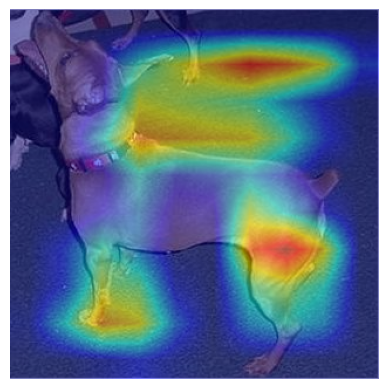

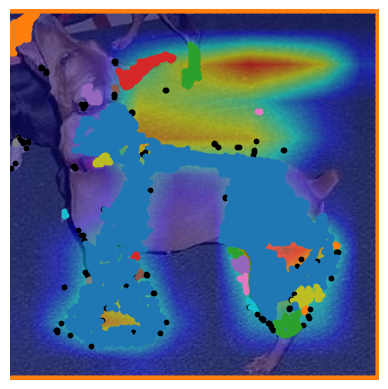

In [168]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(saliency_map, cmap='hot')
plt.axis('off')
plt.show()
saliency_scores = np.sum(saliency_map, axis=2)
top_three_points = np.argpartition(saliency_scores.flatten(), -3)[-3:]
top_three_coordinates = np.unravel_index(top_three_points, saliency_scores.shape)
# 绘制Saliency Map
plt.imshow(saliency_map, cmap='hot')

# 绘制聚类结果
for i, point in enumerate(data):
    x, y = point
    cluster_label = clusters[i]
    if cluster_label == -1:  # 将噪声点标记为黑色
        plt.scatter(y, x, color='black', s=10)
    else:  # 将聚类点用不同颜色标记
        plt.scatter(y, x, color=f'C{cluster_label}', s=10)

plt.axis('off')
plt.show()

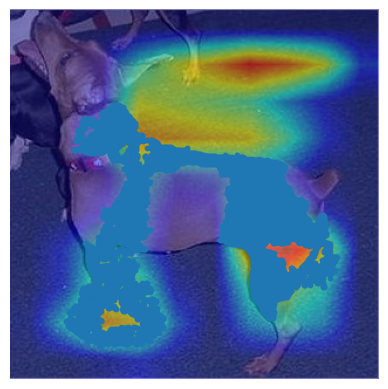

In [169]:
# 绘制Saliency Map
plt.imshow(saliency_map, cmap='hot')

# 绘制前三个聚类结果
for i, point in enumerate(data):
    x, y = point
    cluster_label = clusters[i]
    if cluster_label in top_three_clusters:
        if cluster_label == -1:  # 将噪声点标记为黑色
            plt.scatter(y, x, color='black', s=10)
        else:  # 将聚类点用不同颜色标记
            plt.scatter(y, x, color=f'C{cluster_label}', s=10)

plt.axis('off')
plt.show()

In [133]:
# 进行聚类
eps_values = [1, 5, 10, 15, 20]  # 邻域半径的候选值
min_samples_values = [1,2, 3, 4, 5,10]  # 最小样本数的候选值
# 参数搜索和评估
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(np.transpose(top_k_coordinates))
        print(clusters)




[0 1 2]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[0 1 2]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[0 1 2]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[0 1 2]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[0 1 2]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]
[-1 -1 -1]


In [127]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# 数据集
data = np.transpose(top_k_coordinates)  # 转置坐标数据
print(top_k_coordinates)
print(top_k_coordinates[0])


# 参数搜索范围
eps_values = [1, 5, 10, 15, 20]  # 邻域半径的候选值
min_samples_values = [1,2, 3, 4, 5,10]  # 最小样本数的候选值

best_score = -1  # 最佳评分
best_eps = None  # 最佳邻域半径
best_min_samples = None  # 最佳最小样本数

# 参数搜索和评估
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(data)
            # silhouette_score = metrics.silhouette_score(data, clusters)
        # if silhouette_score > best_score:
            # best_score = silhouette_score
            # best_eps = eps
            # best_min_samples = min_samples
        print(clusters)
        print(clusters[0])

# 输出最佳参数和评分
print("Best parameters:")
print(f"eps: {best_eps}")
print(f"min_samples: {best_min_samples}")
print("Best silhouette score:", best_score)

(array([63, 62, 62]), array([ 44, 132, 220]), array([2, 2, 0]))
[63 62 62]
[0 1 2]
0
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[0 1 2]
0
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[0 1 2]
0
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[0 1 2]
0
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[0 1 2]
0
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
[-1 -1 -1]
-1
Best parameters:
eps: None
min_samples: None
Best silhouette score: -1


In [110]:
# 进行聚类
dbscan = DBSCAN(eps=20, min_samples=15)
clusters = dbscan.fit_predict(np.transpose(top_k_coordinates))

print(clusters)

# 打印聚类结果的坐标
for i, cluster_label in enumerate(clusters):
    if cluster_label != -1:  # 排除噪声点（标签为-1）
        print(f"Point {i} coordinates: ({top_k_coordinates[0][i]}, {top_k_coordinates[1][i]})")

[-1 -1 -1]


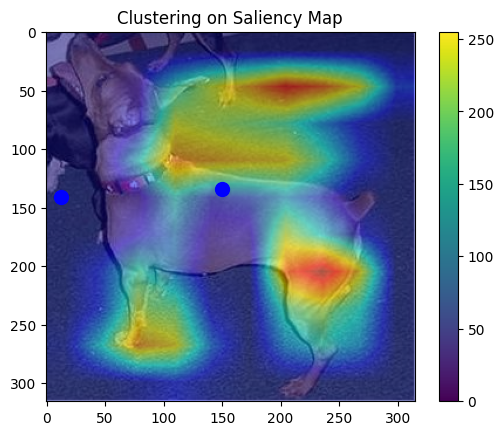

In [97]:
# 绘制Saliency Map
plt.imshow(saliency_map)
plt.colorbar()

# 绘制聚类结果
colors = ['r', 'g', 'b']  # 聚类结果的颜色
for i, coordinate in enumerate(top_k_coordinates):
    cluster_label = clusters[i]
    plt.plot(coordinate[1], coordinate[0], marker='o', color=colors[cluster_label], markersize=10)

plt.title("Clustering on Saliency Map")
plt.show()

In [171]:
#加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10010.npy")

# 获取显著度分数
saliency_scores = np.sum(saliency_map, axis=2)  # 在RGB通道上求和

# 获得具有最大显著度分数的三个点的横纵坐标
top_three_points = np.argpartition(saliency_scores.flatten(), -3)[-3:]
top_three_coordinates = np.unravel_index(top_three_points, saliency_scores.shape)

# 打印每个点的横纵坐标
top_three_cdinates = []
for i in range(len(top_three_coordinates[0])):
    x = top_three_coordinates[0][i]
    y = top_three_coordinates[1][i]
    top_three_cdinates.append([x,y])
    print(f"Point {i+1}: ({x}, {y})")

print(top_three_cdinates)
# 原始数据集的所有点
all_points_coordinates = np.argwhere(saliency_scores > 400)
# print(all_points_coordinates)

# 构建完整数据集
data = np.concatenate((top_three_cdinates, all_points_coordinates), axis=0)
# print(data)

Point 1: (112, 103)
Point 2: (108, 106)
Point 3: (125, 87)
[[112, 103], [108, 106], [125, 87]]


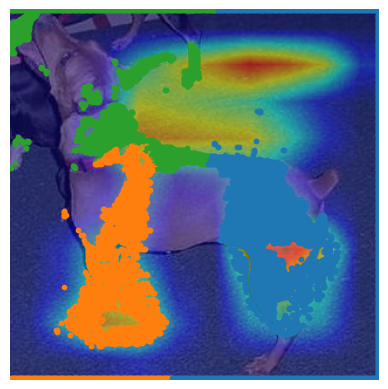

In [186]:
from sklearn.mixture import GaussianMixture
n_components = 3  # 聚类数量
gmm = GaussianMixture(n_components=n_components)

clusters = gmm.fit_predict(data)
top_three_clusters = np.unique(clusters)[:3]

# 绘制Saliency Map
plt.imshow(saliency_map, cmap='hot')

# 绘制前三个聚类结果
for i, point in enumerate(data):
    x, y = point
    cluster_label = clusters[i]
    if cluster_label in top_three_clusters:
        if cluster_label == -1:  # 将噪声点标记为黑色
            plt.scatter(y, x, color='black', s=10)
        else:  # 将聚类点用不同颜色标记
            plt.scatter(y, x, color=f'C{cluster_label}', s=10)

plt.axis('off')
plt.show()

In [192]:
print(top_three_clusters)

[0 1 2]


In [180]:
from hmmlearn import hmm

# 将聚类数据转换为观测序列
observations = [1, 2, 3]  # 观测序列，对应三个聚类
hidden_states = clusters  # 聚类标签作为隐藏状态

from hmmlearn import hmm

# 创建并训练HMM模型
hmm_model = hmm.CategoricalHMM(n_components=3)
# hmm_model.fit([observations], [len(observations)], [hidden_states])
# hmm_model.fit([observations], [len(observations)])
hmm_model.fit([observations], [len(observations)])



transmat = hmm_model.transmat_
emissionprob = hmm_model.emissionprob_

Fitting a model with 17 free scalar parameters with only 3 data points will result in a degenerate solution.


ValueError: lengths array [3] doesn't sum to 1 samples

In [181]:
from hmmlearn import hmm

# 将聚类数据转换为观测序列
observations = [[x] for x in [1, 2, 3]]  # 观测序列，对应三个聚类

# 创建并训练HMM模型
ghmm_model = hmm.GaussianHMM(n_components=3)
ghmm_model.fit(observations)

transmat = ghmm_model.transmat_
means = ghmm_model.means_
covars = ghmm_model.covars_

Fitting a model with 14 free scalar parameters with only 3 data points will result in a degenerate solution.


In [182]:
# 构建观测序列
observations = [data[clusters == cluster_label] for cluster_label in top_three_clusters]

# 创建并训练HMM模型
hmm_model = hmm.GaussianHMM(n_components=n_components)
hmm_model.fit(observations)

# 获取转移概率、均值和协方差矩阵
transmat = hmm_model.transmat_
means = hmm_model.means_
covars = hmm_model.covars_

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [187]:
print(saliency_map)

[[[127 126 189]
  [127 124 187]
  [126 122 185]
  ...
  [124 127 188]
  [125 127 188]
  [127 127 190]]

 [[ 61  57 120]
  [ 56  52 115]
  [ 53  49 112]
  ...
  [ 21  23  84]
  [ 45  48 109]
  [110 111 173]]

 [[ 61  57 120]
  [ 56  52 115]
  [ 50  46 109]
  ...
  [ 22  25  86]
  [ 34  37  98]
  [122 123 185]]

 ...

 [[ 34  40 100]
  [ 41  46 106]
  [ 47  53 113]
  ...
  [ 46  49 111]
  [ 57  60 122]
  [126 127 191]]

 [[ 36  41 102]
  [ 46  50 112]
  [ 54  59 120]
  ...
  [ 40  42 104]
  [ 53  55 117]
  [113 115 178]]

 [[122 126 188]
  [122 127 188]
  [122 127 188]
  ...
  [126 127 190]
  [120 122 184]
  [126 127 191]]]


In [188]:
print(saliency_map.shape)


(316, 315, 3)


In [190]:
print(saliency_map[0][0])

[127 126 189]


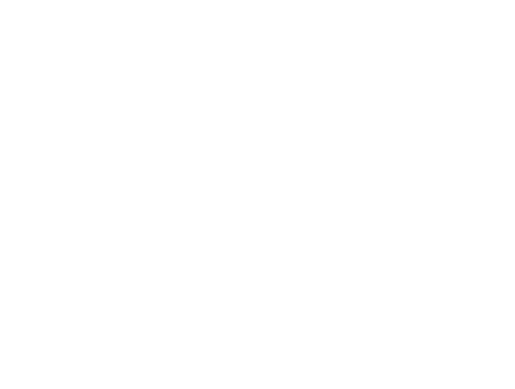

[[9.99499495e-01 1.18713648e-05 4.88633170e-04]
 [1.27965521e-03 9.18318840e-02 9.06888461e-01]
 [9.11374849e-06 6.14359922e-01 3.85630964e-01]]
[1 2 1 ... 2 1 2]


In [196]:
from hmmlearn import hmm
import numpy as np

# 准备数据
cluster1_data = []  # 聚类1的数据，包含点的横纵坐标和saliency score
cluster2_data = []  # 聚类2的数据，包含点的横纵坐标和saliency score
cluster3_data = []  # 聚类3的数据，包含点的横纵坐标和saliency score

for i, point in enumerate(data):
    x, y = point
    cluster_label = clusters[i]
    if cluster_label in top_three_clusters:
        if cluster_label == 0:  # 将噪声点标记为黑色
            cluster1_data.append([x,y,np.sum(saliency_map[x][y])])
        elif cluster_label == 1:  # 将噪声点标记为黑色
            cluster2_data.append([x,y,np.sum(saliency_map[x][y])])
        elif cluster_label == 2:  # 将噪声点标记为黑色
            cluster3_data.append([x,y,np.sum(saliency_map[x][y])])

plt.axis('off')
plt.show()

# 初始化HMM
n_states = 3  # 隐藏状态数量
n_features = 3  # 观测数据的维度（横坐标、纵坐标、saliency score）

# 获取观测序列
cluster1_observations = np.array(cluster1_data)[:, :n_features]
cluster2_observations = np.array(cluster2_data)[:, :n_features]
cluster3_observations = np.array(cluster3_data)[:, :n_features]

# 创建并训练HMM模型
hmm_model = hmm.GaussianHMM(n_components=n_states)
hmm_model.fit(np.concatenate((cluster1_observations, cluster2_observations, cluster3_observations)))

# 获取转移概率矩阵
transmat = hmm_model.transmat_

# 输出转移概率矩阵
print(transmat)

# 获取所有观测序列
all_observations = np.concatenate((cluster1_observations, cluster2_observations, cluster3_observations))

# 使用HMM模型进行预测
predicted_states = hmm_model.predict(all_observations)

# 打印预测的隐藏状态序列
print(predicted_states)

In [200]:
import numpy as np

# 将显著性图展平为一维向量
saliency_vector = saliency_map.flatten()

# 对一维向量进行归一化
normalized_vector = saliency_vector / np.sum(saliency_vector)

print(np.sum(normalized_vector))

# 如果需要确保归一化后的向量总和为1，则进行如下处理：
# 归一化后的向量总和应为1
normalized_vector = normalized_vector / np.sum(normalized_vector)
print(normalized_vector)


1.0
[4.27412084e-06 4.24046635e-06 6.36069952e-06 ... 4.24046635e-06
 4.27412084e-06 6.42800851e-06]


In [ ]:
#加载Saliency Map数据集
saliency_map = np.load("/Users/luopeiyuan/Desktop/FYP/FYP_Codes/deep-learning-for-image-processing/pytorch_classification/grad_cam/ResNet_IMAGE_Folder/DogSaliencyData/10010.npy")

# 获取显著度分数
saliency_scores = np.sum(saliency_map, axis=2)  # 在RGB通道上求和

# 获得具有最大显著度分数的三个点的横纵坐标
top_three_points = np.argpartition(saliency_scores.flatten(), -3)[-3:]
top_three_coordinates = np.unravel_index(top_three_points, saliency_scores.shape)

# 打印每个点的横纵坐标
top_three_cdinates = []
for i in range(len(top_three_coordinates[0])):
    x = top_three_coordinates[0][i]
    y = top_three_coordinates[1][i]
    top_three_cdinates.append([x,y])
    print(f"Point {i+1}: ({x}, {y})")

print(top_three_cdinates)
# 原始数据集的所有点
all_points_coordinates = np.argwhere(saliency_scores > 400)
# print(all_points_coordinates)

# 构建完整数据集
data_all = np.concatenate((top_three_cdinates, all_points_coordinates), axis=0)
# print(data)

In [201]:
data = np.concatenate((top_three_cdinates, all_points_coordinates), axis=0)

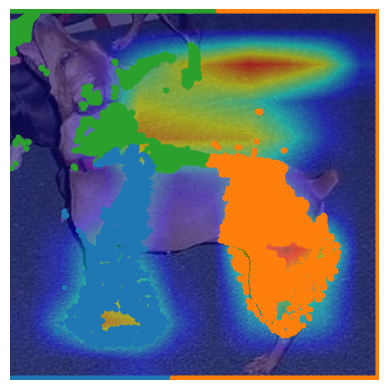

In [202]:
from sklearn.mixture import GaussianMixture
n_components = 3  # 聚类数量
gmm = GaussianMixture(n_components=n_components)

clusters = gmm.fit_predict(data)
top_three_clusters = np.unique(clusters)[:3]

# 绘制Saliency Map
plt.imshow(saliency_map, cmap='hot')

# 绘制前三个聚类结果
for i, point in enumerate(data):
    x, y = point
    cluster_label = clusters[i]
    if cluster_label in top_three_clusters:
        if cluster_label == -1:  # 将噪声点标记为黑色
            plt.scatter(y, x, color='black', s=10)
        else:  # 将聚类点用不同颜色标记
            plt.scatter(y, x, color=f'C{cluster_label}', s=10)

plt.axis('off')
plt.show()